<a href="https://colab.research.google.com/github/mssamoilenko/AnlDataPract/blob/main/AnlPrakt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №4

## Тема: A/B тест та статистична значущість.

## Мета: проведення власного експерименту щодо оцінки різного дизайну веб-сторінок, закріплення навичок проведення A/B тесту та підтвердження статистичної значущості результатів експерименту.

## Варіант №2

## Завдання

1.   Завантажити дані індивідуального варіанту за посиланням на порталі дистанційної освіти.
2.   Використовуючи Pandas відобразити перші 5 рядків даних власного варіанта.
3.   Побудувати коробкові діаграми для даних обох варіантів, розрахувати середнє та медіану.
4.   Самостійно реалізувати перестановочний тест в Python, використовуючи псевдокод, наведений нижче. Оцінити 𝑝-значення за допомогою перестановочного тесту та порівняти із альфа. Зробити висновок про статистичну значущість.

  * a. Альфа взяти 1% для непарних варіантів, 5% для парних.

5.   Використати 𝑡-test для оцінки значущості. Порівняти результати перестановочного A/B тесту і 𝑡-тесту.
6.   Чи правильний висновок зробив ваш колега-новатор?
7.   Навести висновок, який буде містити:

  * a. Чи різниця між варіантами є статистично значущою із відповідними p-значеннями
  * b. Якщо так, то який варіант краще та на скільки відсотків.

## Хід роботи

1.   Завантажую дані індивідуального варіанту за посиланням на порталі дистанційної освіти.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
df = pd.read_csv("2.csv")

2. Використовуючи Pandas відображаю перші 5 рядків даних власного варіанта.

In [2]:
df.head()

,A,B
0,57.12,106.62
1,87.13,125.32
2,140.06,102.05
3,188.39,140.52
4,59.89,61.31


3. Будую коробкові діаграми для даних обох варіантів, розраховую
середнє та медіану.

/tmp/ipython-input-1460610867.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["A"], df["B"]], labels=["A", "B"])


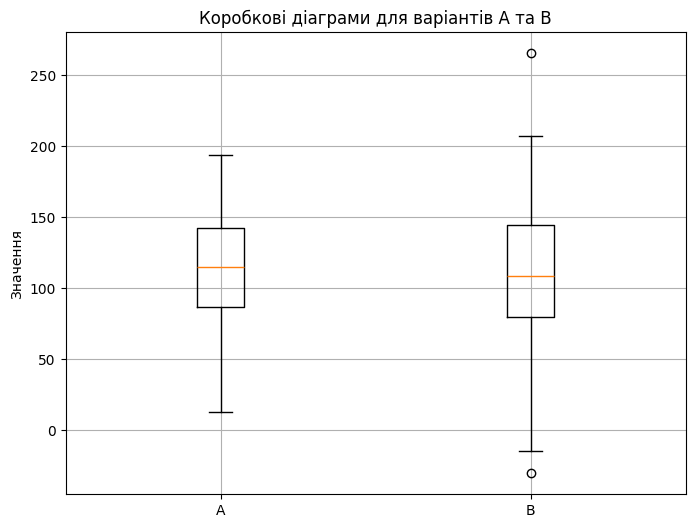

In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot([df["A"], df["B"]], labels=["A", "B"])
plt.title("Коробкові діаграми для варіантів A та B")
plt.ylabel("Значення")
plt.grid(True)
plt.show()

In [5]:
mean_A = df["A"].mean()
median_A = df["A"].median()

mean_B = df["B"].mean()
median_B = df["B"].median()

print("Варіант A:")
print(f"  Середнє: {mean_A:.2f}")
print(f"  Медіана: {median_A:.2f}\n")

print("Варіант B:")
print(f"  Середнє: {mean_B:.2f}")
print(f"  Медіана: {median_B:.2f}\n")

Варіант A:
  Середнє: 113.30
  Медіана: 114.61

Варіант B:
  Середнє: 110.07
  Медіана: 108.61



4. Реалізовую перестановочний тест в Python, використовуючи псевдокод. Оцінюю 𝑝-значення за допомогою перестановочного тесту та порівнюю із альфа. Роблю висновок про статистичну значущість. Альфа беру 5% так як в мене парний варіант.

In [7]:
#Об'єдную результати з різних груп у єдиний набір.
data_A = df["A"].values
data_B = df["B"].values

combined_data = np.concatenate([data_A, data_B])

In [9]:
# Перетасовую об'єднані дані
shuffled_data = np.random.permutation(combined_data)

# Витягую вибірку розміру групи A
perm_A = shuffled_data[:len(data_A)]

In [10]:
# Беру решту даних після вибірки A
remaining_data = shuffled_data[len(data_A):]

perm_B = remaining_data[:len(data_B)]

In [15]:
# Розраховую середні значення для обох груп
mean_perm_A = np.mean(perm_A)
mean_perm_B = np.mean(perm_B)

# Різницю середніх (B - A)
perm_diff = mean_perm_A - mean_perm_B

print("Результати ітерації перестановки:")
print(f"Середнє перестановочної групи A: {mean_perm_A:.4f}")
print(f"Середнє перестановочної групи B: {mean_perm_B:.4f}")
print(f"Різниця середніх (B - A): {perm_diff:.4f}")

Результати ітерації перестановки:
Середнє перестановочної групи A: 113.6377
Середнє перестановочної групи B: 109.7336
Різниця середніх (B - A): 3.9041


In [17]:
# Початкова (спостережувана) різниця середніх
obs_diff = np.mean(data_A) - np.mean(data_B)
obs_diff

np.float64(3.23269999999998)

In [18]:
# Кількість перестановок
R = 200
perm_diffs = []

# Перестановочний тест
for _ in range(R):
    np.random.shuffle(combined_data)
    perm_A = combined_data[:len(data_A)]
    perm_B = combined_data[len(data_A):]
    perm_diff = np.mean(perm_A) - np.mean(perm_B)
    perm_diffs.append(perm_diff)

In [20]:
# Обчислення p-значення (двосторонній тест)
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))

alpha = 0.05

print(f"Спостережувана різниця середніх (A - B): {obs_diff:.4f}")
print(f"p-значення: {p_value:.4f}")

if p_value < alpha:
    print("✅ Є статистично значуща різниця між групами (p < 0.05).")
else:
    print("❌ Немає статистично значущої різниці між групами (p ≥ 0.05).")

Спостережувана різниця середніх (A - B): 3.2327
p-значення: 0.6150
❌ Немає статистично значущої різниці між групами (p ≥ 0.05).


5. Використовую 𝑡-test для оцінки значущості. Порівнюю результати
перестановочного A/B тесту і 𝑡-тесту.

In [22]:
t_stat, p_value_ttest = ttest_ind(data_A, data_B, equal_var=False)

print("\n=== t-тест ===")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значення: {p_value_ttest:.4f}")
print("Висновок:",
      "✅ Значуща різниця" if p_value_ttest < alpha else "❌ Незначуща різниця")


=== t-тест ===
t-статистика: 0.5064
p-значення: 0.6131
Висновок: ❌ Незначуща різниця




*   **Перестановочний тест: p = 0.6150**
*   **t-тест: p = 0.6131**

Обидва методи показали практично ідентичні результати: відсутність статистично значущої різниці між групами.



### 6. Висновок колеги-новатора є неправильним.
Він стверджував, що нова іконка дає на 10% більше переглядів і що різниця є статистично значущою. Наш аналіз показав:


*   Різниця в середньому часі перегляду становить лише ~2.9% на користь варіанту A, а не 10% на користь B.
*   Ця різниця є статистично незначущою (p > 0.05).



## 7. Загальний висновок



1.  Чи є різниця між варіантами статистично значущою?
Ні. Результати як перестановочного тесту (p = 0.6150), так і t-тесту (p = 0.6131) свідчать про відсутність статистичної значущості. p-значення значно перевищують обраний рівень значущості α=0.05.
2.   Якщо так, то який варіант краще та на скільки відсотків?
Оскільки різниця не є значущою, ми не можемо з упевненістю стверджувати, що один варіант кращий за інший. Фактично, середній час перегляду для варіанту A (113.30) вищий за варіант B (110.07) на приблизно 2.9%, але ця різниця з високою ймовірністю є наслідком випадковості.


**Підсумок:** Запропонована колегою-новатором зміна іконки не призводить до статистично значущого збільшення часу перегляду відео на YouTube.


## Відповіді на контрольні питання

1. Перестановочний тест безпосередньо імітує нульову гіпотезу про те, що різниці між групами немає. Ми багаторазово перемішуємо дані між групами A і B і щоразу обчислюємо різницю їхніх середніх. Це дає нам емпіричний розподіл різниць, який ми очікували б бачити, якби нульова гіпотеза була правдою. Якщо наша справжня, спостережувана різниця потрапляє в "хвіст" цього розподілу (тобто є екстремальною порівняно з більшістю перестановлених різниць), ми робимо висновок, що такий результат навряд чи міг виникнути випадково, і thus, він є статистично значущим. У нашому випадку спостережувана різниця легко вкладалася в центральну частину розподілу, що підтвердило її незначущість.

2. Альтернативна гіпотеза – це гіпотеза, яку ми намагаємося довести. У контексті A/B тесту для YouTube це була гіпотеза нашого колеги: "Нова іконка (B) забезпечує статистично значуще збільшення часу перегляду порівняно з класичною (A)". Робота перестановочного тесту та t-тесту полягала в тому, щоб оцінити, чи є достатньо доказів, щоб відкинути нульову гіпотезу на користь цієї альтернативи. Ми виявили, що доказів недостатньо.

3.
    * Двостороння перевірка: Ми перевіряємо, чи одна група просто відрізняється від іншої (краща або гірша). Ми враховуємо обидва "хвости" розподілу. Це обережніший підхід, який використовувався в нашій роботі (np.abs(perm_diffs) >= np.abs(obs_diff)).
    * Одностороння перевірка: Ми заздалегідь перевіряємо, чи одна група саме краща за іншу (напр., чи B > A). Ми враховуємо лише один "хвіст" розподілу.
  Гіпотеза колеги була сформульована як одностороння ("нова іконка дає більше переглядів"), але для більшої строгості та щоб уникнути упередженості, ми використали двосторонній тест.

4. Вибір метрики після огляду даних ("data snooping" або "p-hacking") призводить до інфляції ймовірності помилки 1-го роду. Це означає, що дослідник, перебираючи різні метрики, рано чи пізно знайде таку, яка випадково покаже "значущий" результат. Це створює ілюзію відкриття, тоді як насправді результат є артефактом випадковості. Метрика (у нашому випадку – середній час перегляду) має бути чітко визначена до початку збору даних.

5. Головна обмеженість полягає в тому, що p-значення не говорить ні про практичну значущість, ні про ймовірність того, що гіпотеза істинна. Воно лише показує ймовірність отримати такі ж або більш екстремальні дані за умови істинності нульової гіпотези. У нашому завданні, навіть якби різниця в 3.2 секунди виявилася значущою (p < 0.05), це зовсім не означало б, що ця різниця має будь-яку практичну цінність для бізнесу.

6. Перестановочний тест реалізує нульову гіпотезу шляхом фізичного зруйнування будь-якого зв'язку між результатом (час перегляду) і груповою міткою (A чи B). Перемішуючи дані між групами, ми створюємо нові, "штучні" вибірки, для яких ми знаємо, що нульова гіпотеза є істинною – адже групи більше не існує, є лише одна загальна купа даних. Багаторазове створення таких вибірок будує розподіл різниць, який ми очікували б за чистої випадковості.

7. Попередньо визначена гіпотеза захищає дослідження від упередженості підтвердження та "p-hacking". Вона змушує нас чітко сформулювати, що саме ми тестуємо, які дані збираємо і як їх аналізуємо до того, як ми побачимо результати. Це робить аналіз об'єктивним і науковим. У нашому випадку, якби ми не мали чіткої гіпотези, ми могли б після факту вирішити, що "медіана важливіша за середнє", і знайти спосіб "підігнати" результат.

8. Основний висновок: Статистична значущість не є тотожною практичній корисності. Результат може бути статистично значущим (тобто, дуже малоймовірним за умови випадковості), але мати настільки малий ефект (наприклад, збільшення часу перегляду на 0.1 секунди), що його впровадження буде марною витратою ресурсів. І навпаки, великий і важливий ефект може бути не виявлений через замалу вибірку.

9. Основна мета – спланувати експеримент таким чином, щоб його результати були незаперечними та об'єктивними. Це включає визначення цілей, формулювання гіпотез, вибір метрик, розрахунок необхідного обсягу вибірки та, що найважливіше, застосування рандомізації для усунення сторонніх впливів. Правильний дизайн дозволяє зробити висновок про причинно-наслідковий зв'язок, а не лише про кореляцію.

10. Рандомізація (випадковий розподіл користувачів по групах) є ключовим засобом усунення змішувальних факторів. Вона гарантує, що групи A і B в середньому будуть подібними за всіма характеристиками (вік, стать, геолокація, активність тощо), крім однієї – тестового варіанту (іконки). Це дозволяє з упевненістю приписати будь-яку виявлену статистично значущу різницю саме впливу цього варіанту, а не іншим, прихованим факторам.